In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
planets = sns.load_dataset("planets")


#### Eksik Değerlerin İncelenmesi

In [2]:
df = planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [4]:
df.isnull().values.any() # eksik değer var mı?

True

In [5]:
df.isnull().sum() # eksik değerlerin toplamı

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [6]:
df["orbital_period"].fillna(0, inplace = True) # eksik değerleri 0 ile doldurduk

In [7]:
df.isnull().sum() # eksik değerlerin toplamı

method              0
number              0
orbital_period      0
mass              522
distance          227
year                0
dtype: int64

In [8]:
df["orbital_period"].fillna(df.orbital_period.mean(), inplace = True) # eksik değerleri ortalama ile doldurduk

In [9]:
df["mass"].fillna(df.mass.mean(), inplace = True) # eksik değerleri ortalama ile doldurduk

In [10]:
df.isnull().sum() # eksik değerlerin toplamı

method              0
number              0
orbital_period      0
mass                0
distance          227
year                0
dtype: int64

In [11]:
df.fillna(df.mean(), inplace = True) # eksik değerleri ortalama ile doldurduk

C:\Users\BERKCAN\AppData\Local\Temp\ipykernel_19748\1655870615.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace = True) # eksik değerleri ortalama ile doldurduk


In [12]:
df.isnull().sum() # eksik değerlerin toplamı

method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

In [14]:
df = planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


### Kategorik Değişken Özetleri

##### Sadece Kategorik Değişkenlerin Özetleri

In [16]:
kat_df = df.select_dtypes(include = ["object"])
kat_df.head()

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


##### Kategorik Değişkenin Sınıflarına ve Sınıf Sayılarına Erişmek

In [17]:
kat_df.method.unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [19]:
kat_df["method"].value_counts().count()

10

##### Kategorik Değişkenin Sınıflarının Frekanslarına Erişmek

In [20]:
kat_df["method"].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

Text(0.5, 1.0, 'method sütununun frekans grafiği')

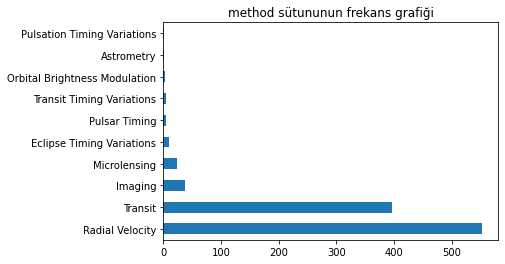

In [21]:
df["method"].value_counts().plot.barh().set_title("method sütununun frekans grafiği")

#### Sürekli Değişken Özetleri

In [22]:
df_num = df.select_dtypes(include = ["float64", "int64"])
df_num.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [25]:
df_num["distance"].describe()

count     808.000000
mean      264.069282
std       733.116493
min         1.350000
25%        32.560000
50%        55.250000
75%       178.500000
max      8500.000000
Name: distance, dtype: float64

In [26]:
print("Ortalama: ", df_num["distance"].mean())
print("Dolu Gözlem Sayısı: ", df_num["distance"].count())
print("Maksimum Değer: ", df_num["distance"].max())
print("Minimum Değer: ", df_num["distance"].min())
print("Medyan: ", df_num["distance"].median())
print("Standart Sapma: ", df_num["distance"].std())

Ortalama:  264.06928217821786
Dolu Gözlem Sayısı:  808
Maksimum Değer:  8500.0
Minimum Değer:  1.35
Medyan:  55.25
Standart Sapma:  733.1164929404421
